# Проект: Принятие решений в бизнесе

    Совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки крупного интернет-магазина. Наобходимо приоретизировать гипотезы, провести A/B тест и проанализировать результаты.

**Описание данных:**

**Данные для порвой части**

Файл /datasets/hypothesis.csv. 

``Hypothesis`` — краткое описание гипотезы;

``Reach`` — охват пользователей по 10-балльной шкале;

``Impact`` — влияние на пользователей по 10-балльной шкале;

``Confidence`` — уверенность в гипотезе по 10-балльной шкале;

``Efforts`` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл ``/datasets/orders.csv``. Скачать датасет

``transactionId`` — идентификатор заказа;

``visitorId`` — идентификатор пользователя, совершившего заказ;

``date`` — дата, когда был совершён заказ;

``revenue`` — выручка заказа;

``group`` — группа A/B-теста, в которую попал заказ.

Файл ``/datasets/visitors.csv``. Скачать датасет

``date`` — дата;

``group`` — группа A/B-теста;

``visitors`` — количество пользователей в указанную дату в указанной группе A/B-теста

# План

1. Приоритизация гипотез.

1.1. Загрузка данных  ``'/datasets/hypothesis.csv'``  

1.2. Приоретизация гипотез

- Применение фреймворка ``ICE``

- Применение фреймворка ``RICE``


2. Анализ A/B-теста

2.1. Загрузка данных ``'/datasets/orders.csv'`` , ``'/datasets/visitors.csv'``

2.2. Предобработка данных

2.3. График кумулятивной выручки по группам

2.4. График кумулятивного среднего чека по группам.

2.5. График относительного изменения кумулятивного среднего чека группы B к группе A.

2.6. График кумулятивного среднего количества заказов на посетителя по группам. 

2.7. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

2.8. Точечный график количества заказов по пользователям.

2.9. Расчет 95-й и 99-й перцентилей количества заказов на пользователя.

2.10. Точечный график стоимостей заказов.

2.11. Расчет 95-й и 99-й перцентилей стоимости заказов.

2.12. Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

2.13. Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

2.14. Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

2.15. Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

2.16. График кумулятивной выручки по группам  по очищенным данным

2.17.  График кумулятивного среднего чека по группам по очищенным данным

2.18.  График относительного изменения кумулятивного среднего чека группы B к группе A по очищенным данным

3. Итоги 

## Приоритизация гипотез.

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import math as math
import datetime as dt

from scipy.stats import poisson
from math import factorial
from math import sqrt
from scipy.stats import binom

pd.set_option('display.max_colwidth', 400)


In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')


In [3]:
display(hypothesis.head(5))

hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.columns = ['hypothesis','reach','impact', 'confidence', 'efforts']

### Приоретизация гипотез

**Применение фреймворка ``ICE``**

In [5]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

display(hypothesis.sort_values(by='ICE', ascending=False))



,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Наиболее перспективные гипотезы при Применении фреймворка ICE 8,0,7

**Применение фреймворка ``RICE``**

In [6]:
hypothesis['RICE']=(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
display(hypothesis.sort_values(by='RICE',ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


In [7]:
hypothesis['ranked_ICE']=hypothesis['ICE'].rank()
hypothesis['ranked_RICE']=hypothesis['RICE'].rank()

display(hypothesis[['hypothesis','ranked_ICE','ranked_RICE']].sort_values(by='ranked_RICE',ascending=True).style.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu"))

,hypothesis,ranked_ICE,ranked_RICE
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,1.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000,2.500000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3.000000,2.500000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",2.000000,4.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",9.000000,5.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",8.000000,6.500000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",6.000000,6.500000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",5.000000,8.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7.000000,9.000000


Наиболее перспективные гипотезы при применении фреймворка RICE 7,2,0. В топ-3 гипотезы 7 и 0, но гипотеза 7 уже на 1м месте. Такое изменение по сравнению с применением фреймворка ``ICE`` происходит потому что компонент Reach(скольких пользователей затронет изменение), который используется при применении фреймворка ``RICE`` для гипотезы 7 имеет значение 10, а у гипотезу 0 этот компонтент только 3.

Загружен и изучен датафрейм ``/datasets/hypothesis.csv`` В елях приоретизации гипотез использованы фреймворка ``ICE`` Наиболее перспективные гипотезы при Применении фреймворка ICE 8,0,7. При использовании фреймворка ``RICE`` наиболее перспективные гипотезы при применении фреймворка RICE 7,2,0. В топ-3 гипотезы 7 и 0, но гипотеза 7 уже на 1м месте. Такое изменение по сравнению с применением фреймворка ICE происходит потому что компонент Reach(скольких пользователей затронет изменение), который используется при применении фреймворка RICE для гипотезы 7 имеет значение 10, а у гипотезу 0 этот компонтент только 3.

## Анализ A/B-теста

### Загрузка данных

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### Предобработка данных

In [9]:
display(orders.head())
display(orders['group'].unique())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


array(['B', 'A'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [11]:
display(visitors.head())
display(visitors['group'].unique())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


array(['A', 'B'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


приведем данные столбца visitors['date'] в формат datetime

In [12]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
display(orders.isna().sum())
display(orders.duplicated().sum())


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

0

In [15]:
display(visitors.isna().sum())
display(visitors.duplicated().sum())

date        0
group       0
visitors    0
dtype: int64

0

дубликаты и пропуски не выявлены

Проверим наличие одинаковых пользователей в группах А и В

In [16]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

в результате расчета, оказалось что есть есть совпадения пользователей в обеих группах. Выведем их в новый датафрейм и далее очистим исходный датасет от "задвоения"

In [17]:
double_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitorId'].unique()

In [18]:
orders = orders.query('visitorId not in @double_users')

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


В ходе предобработки данных изучены данные датафреймов ``'/datasets/orders.csv'`` и ``'/datasets/visitors.csv'``. Пропуски и дубликаты не выявлены. Формат данных столбца visitors['date'] в формат datetime. Датасет ``orders`` очищен от задвоние пользователей в группах А и В

### График кумулятивной выручки по группам

Подготовим данные для дальнейшего анализа

In [20]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(10)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845
5 2019-08-03     B      54      53   288850      1803
6 2019-08-04     A      77      71   388030      2562
7 2019-08-04     B      68      66   385740      2573
8 2019-08-05     A      99      92   474413      3318
9 2019-08-05     B      89      87   475648      3280


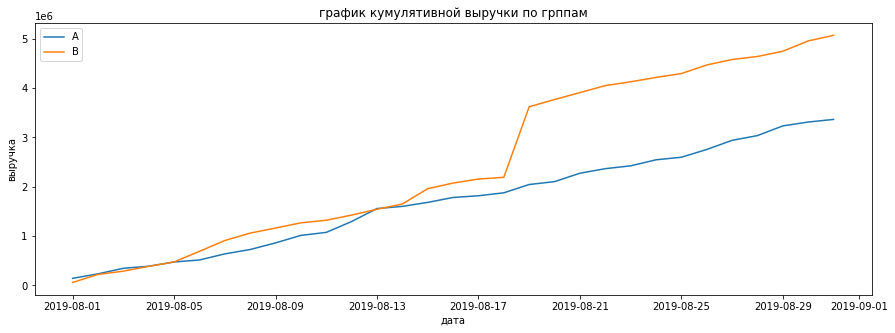

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# зададим размер графика
plt.figure(figsize=(15, 5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('график кумулятивной выручки по грппам')
plt.xlabel('дата')
plt.ylabel('выручка')

plt.legend() 
plt.show()

Выручка обеих групп растет, но по графику кумулятивной выручки на 5й день группа B резкой увеличивается. Причиной может быть нехарактерные более дорогие заказы или резкое увеличиение самих заказов в группе B.

### График кумулятивного среднего чека по группам

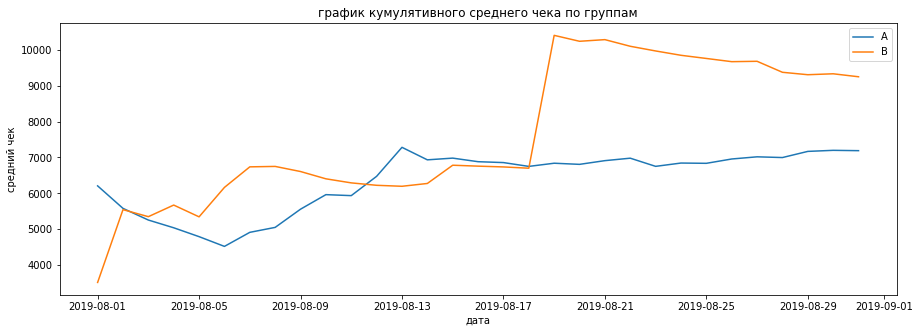

In [22]:

# зададим размер графика
plt.figure(figsize=(15, 5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('график кумулятивного среднего чека по группам')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.legend() 
plt.show()

Значиения кумулятивного среднего чека по группам сильно колеблются, но на 5й день в группе B наблюдается резкое увеличние этого показателя, с последующим снижением. Что может говорить о появлении в группе B дорогих заказов. Ближе к концу теста средний чек в обеих группах стабилизируется. 

### График относительного изменения кумулятивного среднего чека группы B к группе A

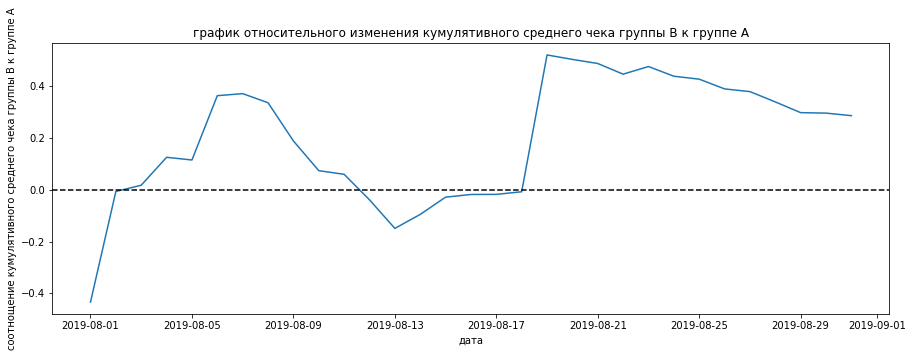

In [23]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# зададим размер графика
plt.figure(figsize=(15, 5)) 

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата')
plt.ylabel('соотнощение кумулятивного среднего чека группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

На графике относительного изменения кумулятивного среднего чека группы B к группе A имеются резкие колебания, Возможно присутствуют крупные заказы.

### График кумулятивного среднего количества заказов на посетителя по группам

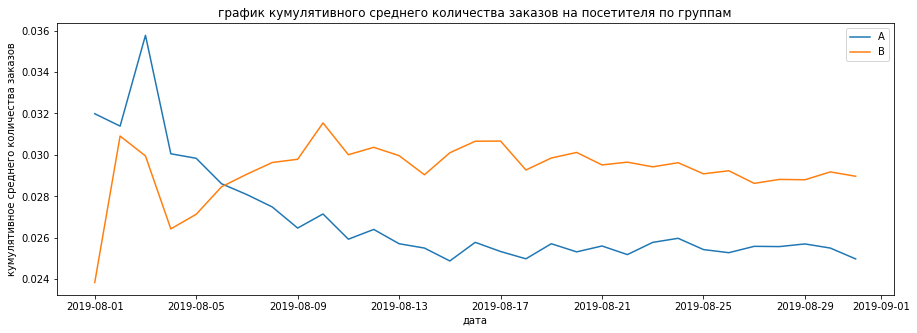

In [24]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# зададим размер графика
plt.figure(figsize=(15, 5)) 
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('график кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('дата')
plt.ylabel('кумулятивное среднего количества заказов')
plt.legend()
plt.show()

на 2й день по среднему количеству заказов группа А резко снижается, тогда как в групе В среднее количество заказов наоборот резко увеличивается. Под конец теста в обеих группа наблюдается снижение, но в группе А это более выражено.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

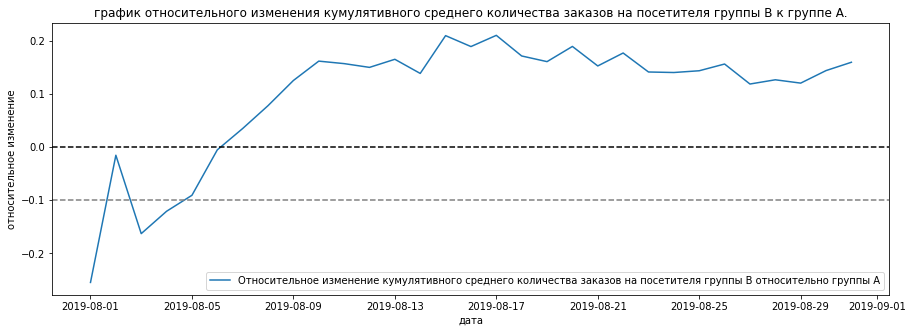

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5)) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительное изменение кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.title('график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.')
plt.xlabel('дата')
plt.ylabel('относительное изменение')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

Уже на 2й группа В имеет большее количество заказов по сравнению с группой А.

### Точечный график количества заказов по пользователям

In [26]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(20)) 

      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2
118   522292794       2
628  2733145037       2
634  2744017357       2
407  1772171838       2
548  2397843657       2
529  2306096143       2
940  4134830387       2
94    406208401       2
176   759473111       2
476  2096506107       2


Text(0, 0.5, 'количество заказов')

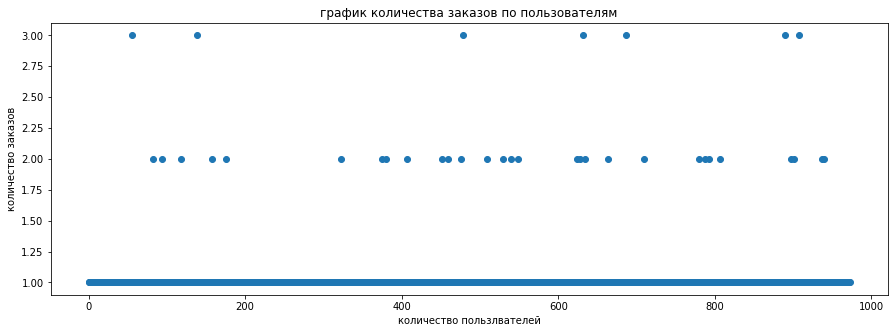

In [27]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15, 5)) 
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('график количества заказов по пользователям')
plt.xlabel('количество пользлвателей')
plt.ylabel('количество заказов')

Основная масса пользователей сделало по дному заказу, реже 2 заказа. Очень редко пользователи совершают 3 заказа.

###  Расчет 95-й и 99-й перцентилей количества заказов на пользователя**

In [28]:
display(np.percentile(ordersByUsers['orders'], [95, 99])) 

array([1., 2.])

5% пользователей совершили 1 и более заказа, и только 1% пользователей совершили более 2 зказов. Примем за аномальное количество заказов 2 и более заказа

###  Точечный график стоимостей заказов

In [29]:
# предвариатльено посмотрим на табличные значения с сортировкой по выручке от большего значения
print(orders.sort_values(by='revenue', ascending=False).head(20)) 

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A
949      1347999392   887908475 2019-08-21    60450     A
940      2420050534  4003628586 2019-08-08    58550     B
131      3163614039  2254586615 2019-08-22    53904     A
287       587872075  2254456485 2019-08-24    53904     A
613      4071177889  3931967268 2019-08-07    53904     B
1006     1861540412  2261934787 2019-08-10    52900     A
1142     3815014015  2606908679 2019-08-13    52900     B
1137     2183069967   759473111 2019-08-13    52480     A
746      1589082866  3321013705 2019-08-27    49495     A
709       5145

Строим точечный график стоимостей заказов

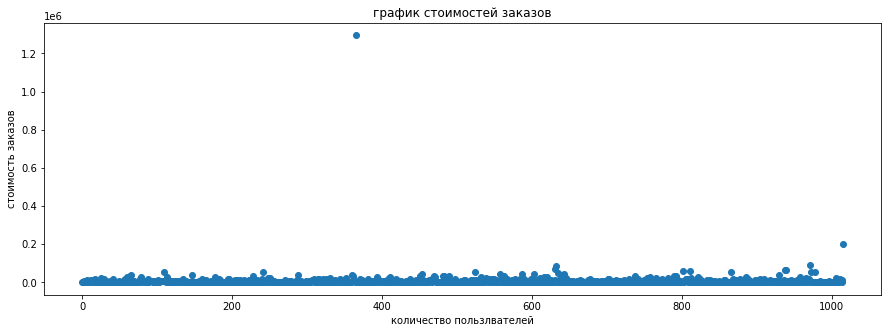

In [30]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15, 5)) 
plt.scatter(x_values, orders['revenue']) 
plt.title('график стоимостей заказов')
plt.xlabel('количество пользлвателей')
plt.ylabel('стоимость заказов')
plt.show()

Есть несколько дорогих закзов, которые могу существенно повлиять на средний показатель

###  Расчет 95-й и 99-й перцентелей стоимости заказов**

In [31]:
display(np.percentile(orders['revenue'], [95, 99])) 

array([26785., 53904.])

5% заказов стоимостью 26785 и более, и только 1% зказов стоимостью 53904 и более. Примем за аномальное значение стоимость заказов 53904

###  Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Подготовим данные

In [32]:
# формируем датафрейм группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# сформируем кумулятивные данные по дате и количеству посещений
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# формируем датафрейм группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# сформируем кумулятивные данные по дате и количеству посещений
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# сформируем кумулятивные данные по дате и сумме выручки
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# сформируем кумулятивные данные по дате и сумме выручки
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# объединим полученные датафреймы для групп А и В
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Нулевая гипотеза H0 - статистическая значимость между группами А и В по среднему количеству заказов отсутствует

Альтернативная гипотеза H1 - между группами А и В есть статистически значимое различие

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value: ', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Отностительная разница: ', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

p-value:  0.011
Отностительная разница:  0.160


Уровень стат.значимости 1,1%, меньше p-value 0,05. Нулевую гипотезу о том, что разницы между группами по среднему количеству заказов следует отвергнуть. Высока вероятность, что разница между группами присутствует. Разница между группами составляет 16% в пользу группы B.

###  Рассчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза H0 - статистической разницы между группами А и В по среднему чеку отсутствуют

Альтернативная гипотеза H1 - между группами А и В есть статистически значимое различие

In [34]:
print('p-value: ', '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Отностильная разница: ','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value:  0.829
Отностильная разница:  0.287


Уровень стат.значимости 82,9%, значительно больше p-value 0,05. Нулевую гипотезу о равенстве стредних чеков не отвергаем. Высока вероятность, что разница по среднему чеку отсутствует. Наблюдается разница между группами 28,7% в пользу группы B, не является статистически значимым.

###  Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

проверим сколько всего аномальных пользователей

In [35]:
order_lim = np.percentile(ordersByUsers['orders'], 95)

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_lim]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > order_lim]['userId'],
    ],
    axis=0,
)

revenue_lim = np.percentile(orders['revenue'], 99)

usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.sort_values(ascending=False).head())
display(abnormalUsers.shape[0]) 

507    4134830387
743    4133034833
430    4109358064
940    4003628586
416    3967698036
dtype: int64

45

Всего 31 аномальный пользователь

Подготовим выборки количества заказов по пользователям по группам теста по очищенным данным

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [37]:
print('p-value: ', '{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Отностильная разница: ', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value:  0.008
Отностильная разница:  0.188


Уровень стат.значимости 0,8%, меньше p-value 0,05. Нулевую гипотезу о том, что разницы между группами по среднему количеству заказов нет следует отвергнуть. Высока вероятность, что есть разница между группами. Относительная разница между группами после очистки составляет уже 18,8% против 16,0% неочищенных данных в пользу группы B.

###  Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Нулевая гипотеза H0 - группы А и В по среднему чеку равны

Альтернативная гипотеза H1 - между группами А и В есть статистически значимое различие

In [38]:
print('p-value: ',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Отностильная разница: ',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value:  0.969
Отностильная разница:  0.002


P-value увеличился до 96,6% на очищенных данных. Статистическая значимость значительно больше 5%. Нулевая гипотеза о равенстве средних чеков не отвергается, также как и по неочищенным данным. Но относительная разница между сегментами существенно изменилась с 28,7% в пользу группы В по неочищенным данным до всего 0,2% в пользу группы А по очищенным данным. Не является статистичеси значимой

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- По сырым данным нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий статистически значимое различие есть.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения 

### График кумулятивной выручки по группам  по очищенным данным

Построим графики для наглядной демонтрации полученных результатов

Подготовим данные. Сформируем датафрейм очищенный от аномальных пользователей.

In [39]:
orders_clean = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]
display(orders_clean)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


In [40]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups_clean = orders_clean[['date','group']].drop_duplicates()
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated_clean = datesGroups_clean.apply(lambda x: orders_clean[np.logical_and(orders_clean['date'] <= x['date'], orders_clean['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated_clean = datesGroups_clean.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData_clean = ordersAggregated_clean.merge(visitorsAggregated_clean, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_clean.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData_clean.head(10)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      15      15    89858       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      30      30   136341      1338
3 2019-08-02     B      37      37   213431      1294
4 2019-08-03     A      54      54   248814      1845
5 2019-08-03     B      51      51   280480      1803
6 2019-08-04     A      64      64   289880      2562
7 2019-08-04     B      63      63   364520      2573
8 2019-08-05     A      84      84   369473      3318
9 2019-08-05     B      84      84   454428      3280


**Построим график кумулятивной выручки по группам  по очищенным данным**

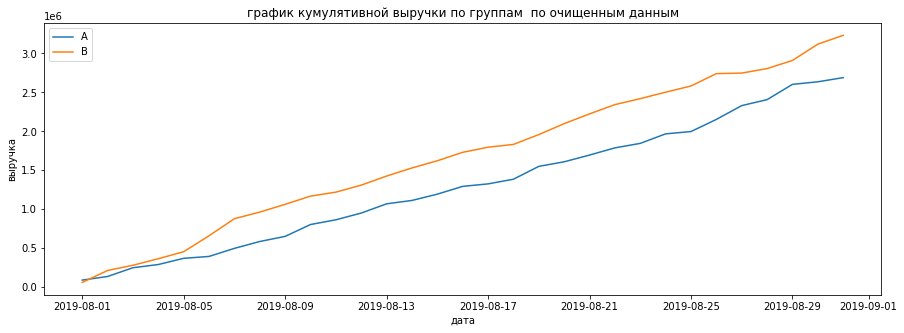

In [41]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA_clean = cumulativeData_clean[cumulativeData_clean['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB_clean = cumulativeData_clean[cumulativeData_clean['group']=='B'][['date','revenue', 'orders']]

# зададим размер графика
plt.figure(figsize=(15, 5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA_clean['date'], cumulativeRevenueA_clean['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB_clean['date'], cumulativeRevenueB_clean['revenue'], label='B')

plt.title('график кумулятивной выручки по группам  по очищенным данным')
plt.xlabel('дата')
plt.ylabel('выручка')

plt.legend() 
plt.show()

После очистки данных видно, что резких всплесков в группе В уже нет. Рост в обеих группах равномерный, группа В имеет приемущество по кумелятивной выручке

### График кумулятивного среднего чека по группам по очищенным данным

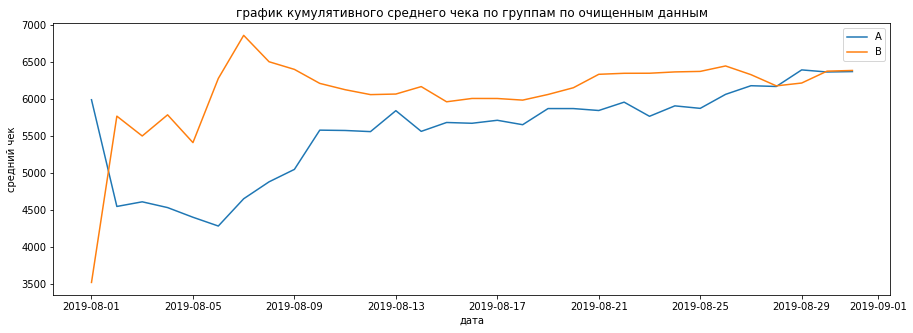

In [42]:

# зададим размер графика
plt.figure(figsize=(15, 5))

plt.plot(cumulativeRevenueA_clean['date'], cumulativeRevenueA_clean['revenue']/cumulativeRevenueA_clean['orders'], label='A')
plt.plot(cumulativeRevenueB_clean['date'], cumulativeRevenueB_clean['revenue']/cumulativeRevenueB_clean['orders'], label='B')
plt.title('график кумулятивного среднего чека по группам по очищенным данным')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.legend() 
plt.show()

После очиски на графике среднего чека наблюдается колебания в обеих группах. Под конец теста средний размер чека в группе А становится больше, чем в группе В

### График относительного изменения кумулятивного среднего чека группы B к группе A  по очищенным данным

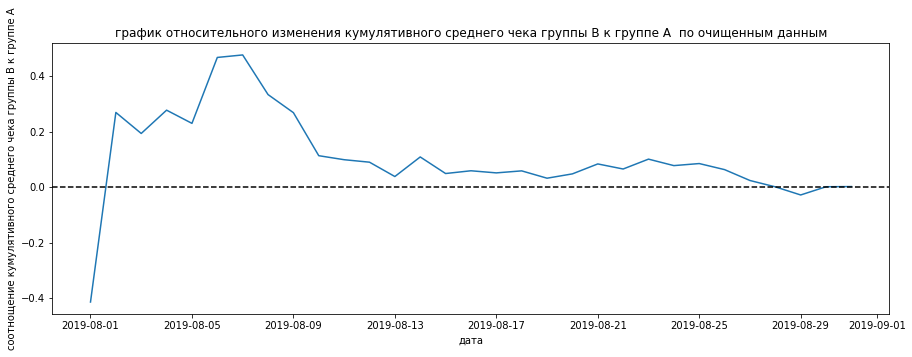

In [43]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue_clean = cumulativeRevenueA_clean.merge(cumulativeRevenueB_clean, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# зададим размер графика
plt.figure(figsize=(15, 5)) 

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue_clean['date'], (mergedCumulativeRevenue_clean['revenueB']/mergedCumulativeRevenue_clean['ordersB'])/(mergedCumulativeRevenue_clean['revenueA']/mergedCumulativeRevenue_clean['ordersA'])-1)
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A  по очищенным данным')
plt.xlabel('дата')
plt.ylabel('соотнощение кумулятивного среднего чека группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

На графике относительного изменения кумулятивного среднего чека группы B к группе A  по очищенным данным наблюдается с4го дня некоторая стабилизация соотношения средних чеков. В конце теста незначительное приемущество по среднему чеку у группы А. 

## Итоги

   В ходе проеденного А/В тетса получены следующие результаты:
   
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Для среднего количества заказов по сырым данным и очищенным уровень стат.значимости 1,1% и 0,8% соответственно, меньше p-value 5%. Нулевую гипотезу о том, что  нет разницы между группами по среднему количеству заказов следует отвергнуть. Высока вероятность, что разница между группами есть. Относительная разница между группами после очистки составляет уже 18,8% против 16% неочищенных данных в пользу группы B.
    
- По сырым данным и очищенным нет статистически значимого различия по среднему чеку между группами, но после очистки относительная разница между сегментами существенно изменилась с 28,7% в пользу группы В по неочищенным данным до всего 0,2% в пользу группы А по очищенным данным.
    
По полученным в ходе А/В теста результатам при соотвутствующих средних чеках в обеих группах, группа В имеет приемущество по конверсии заказов. А/В тест следует завершить, он оказался упешным. Результаты А/В теста следует предоставить отделу маркетинга для возможного дальнейшего разивитя по увеличению среднего чека. 

